In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data = df['sepal_length']
print(f"Mean: {data.mean()}")
print(f"Median: {data.median()}")
print(f"Standard Deviation: {data.std()}") 
print(f"Variance: {data.var()}")

Mean: 5.843333333333334
Median: 5.8
Standard Deviation: 0.828066127977863
Variance: 0.6856935123042507


In [7]:
print(f"Mean: {data.mean(): .2f}, Min: {data.min(): .2f}, Max: {data.max(): .2f}")

Mean:  5.84, Min:  4.30, Max:  7.90


In [8]:
# Range
print(f"Range: {data.max() - data.min(): .2f}")

Range:  3.60


In [9]:
# IQR
print(f"IQR: {data.quantile(0.75) - data.quantile(0.25): .2f}")

IQR:  1.30


In [10]:
# IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
print(f"IQR: {Q3 - Q1: .2f}")

IQR:  1.30


In [11]:
Q1

5.1

In [12]:
Q3

6.4

In [13]:
# Variance
pop_variance = data.var(ddof=0)
print(f"Population Variance: {pop_variance: .2f}")

Population Variance:  0.68


In [24]:
# Variance
sample_variance = data.var(ddof=1)
print(f"Sample Variance: {sample_variance: .2f}")

Sample Variance:  0.69


In [23]:
# Variance
pop_var = np.var(data, ddof=0)
print(f"Population Variance: {pop_var: .2f}")

sample_var = np.var(data, ddof=1)
print(f"Sample Variance: {sample_var: .2f}")


Population Variance:  0.68
Sample Variance:  0.69


In [15]:
# Standard Deviation
pop_std_dev = data.std(ddof=0)
print(f"Population Standard Deviation: {pop_std_dev: .2f}")

sample_std_dev = data.std(ddof=1)
print(f"Sample Standard Deviation: {sample_std_dev: .2f}")

Population Standard Deviation:  0.83
Sample Standard Deviation:  0.83


In [17]:
# Standard Deviation
pop_std = np.std(data, ddof=0)
pop_std

0.8253012917851409

In [19]:
# Standard Deviation
sample_std = np.std(data, ddof=1)
sample_std


0.828066127977863

In [22]:
# Default differences
print(data.std()) # default is sample
print(np.std(data)) # default is population

0.828066127977863
0.8253012917851409


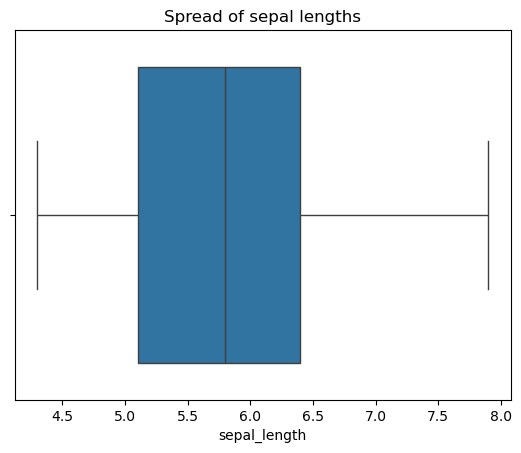

In [25]:
sns.boxplot(x=data)
plt.title('Spread of sepal lengths')
plt.show()

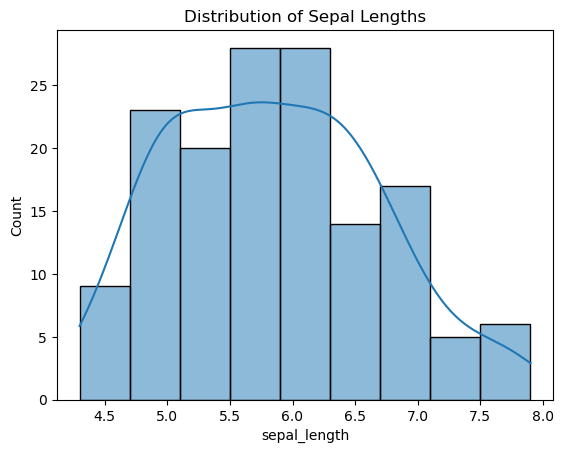

In [28]:
sns.histplot(x=data, kde=True)
plt.title("Distribution of Sepal Lengths")
plt.show()

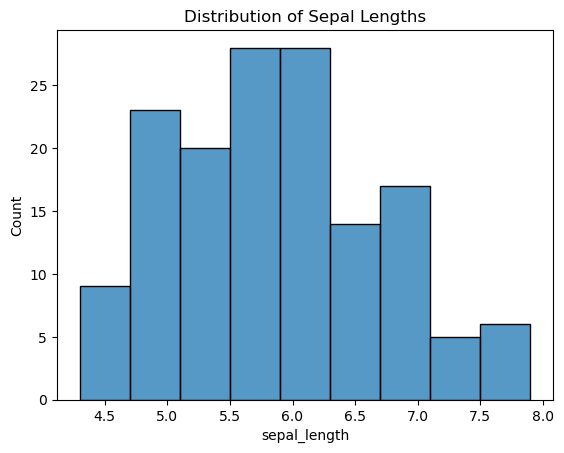

In [29]:
sns.histplot(x=data)
plt.title("Distribution of Sepal Lengths")
plt.show()

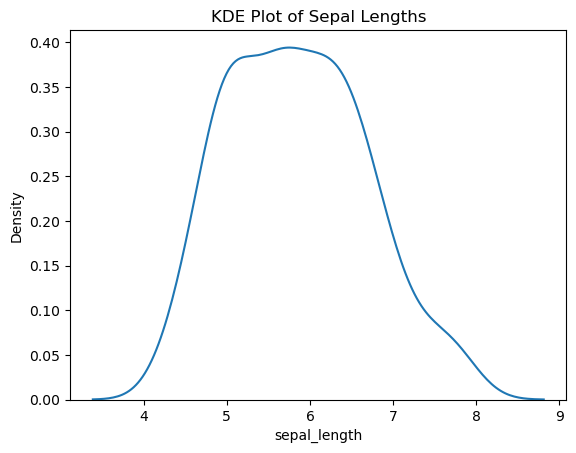

In [30]:
# kde plot
sns.kdeplot(x=data)
plt.title("KDE Plot of Sepal Lengths")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Density'>

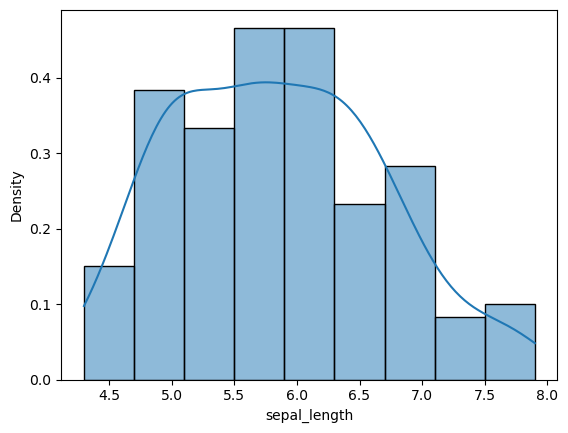

In [33]:

# histogram customized for KDE
sns.histplot(data=data, kde=True, stat="density")

[3.38805631 3.41531202 3.44256774 3.46982346 3.49707917 3.52433489
 3.5515906  3.57884632 3.60610203 3.63335775]
200
[0.00022618 0.0003017  0.00039951 0.00052519 0.00068543 0.00088817
 0.00114268 0.00145974 0.0018517  0.00233256]
200
density at 6: 0.3904191560853395
density at 8: 0.0363848139130908
Probability around 6: 0.03904036116742182
Probability around 8: 0.003642027452542368


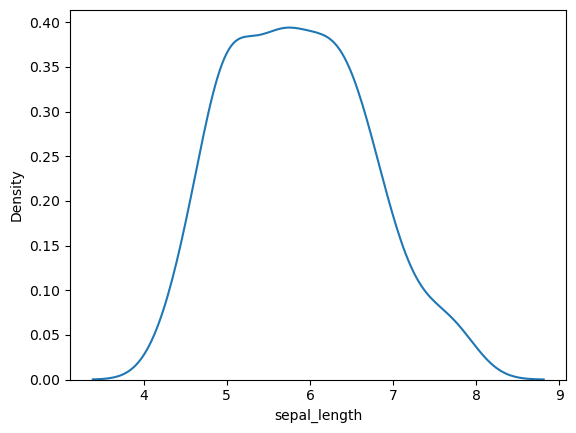

In [46]:
# Using KDE to estimate probability
# What’s the probability it falls in a small range around that value? 7 and 8.
from scipy.integrate import quad # quad integrates over the small interval → gives probability.

# Fit KDE
kde = sns.kdeplot(data=df, x="sepal_length").get_lines()[0] # Plot the KDE, then grab the line that was drawn
# seaborn.kdeplot draws a line on a matplotlib Axes object. That line is actually a matplotlib Line2D object.
# .get_lines() → returns a list of all the line objects drawn on that Axes.
# [0] → gets the first line (which is your KDE curve).

x_vals = kde.get_xdata() # returns the array of x-values used to draw the curve
y_vals = kde.get_ydata() # returns the array of y-values (the density) at those x-points
print(x_vals[:10]) # first 10 x-values
print(len(x_vals)) # number of x-values

print(y_vals[:10]) # first 10 y-values (densities)
print(len(y_vals)) # number of y-values (densities)

# Interpolation function for integration
from scipy.interpolate import interp1d # interp1d creates an interpolation function from given x–y points

# KDE-based PDF (density)
f = interp1d(
    x_vals,          # known x points
    y_vals,          # known y points (density)
    kind='linear',   # interpolate between points linearly
    fill_value=0,    # density = 0 outside data range
    bounds_error=False  # don't throw error if x is outside range
) 

print(f"density at 6: {f(6)}")  # density at x = 6
print(f"density at 8: {f(8)}")  # density at x = 8

# Probability for ±0.05 around 6: P(5.95≤x≤6.05)
prob_6, _ = quad(f, 5.95, 6.05) # Integrates f(x) between 5.95 and 6.05
print(f"Probability around 6: {prob_6}")

# Probability for ±0.05 around 8: P(7.95≤x≤8.05)
prob_8, _ = quad(f, 7.95, 8.05) # Integrates f(x) between 7.95 and 8.05
print(f"Probability around 8: {prob_8}")

# KDE is telling us:
# Sepal lengths near 6 are more common.
# Sepal lengths near 8 are rare.

In [47]:
# loop over columns to get custom measures
for col in df.select_dtypes(include=np.number).columns: # Loop through each numeric column, select_dtypes selects columns by data type
    col_data = df[col]
    col_range = col_data.max() - col_data.min()
    col_iqr = np.percentile(col_data, 75) - np.percentile(col_data, 25)
    print(f"{col}: Range={col_range:.2f}, IQR={col_iqr:.2f}")

sepal_length: Range=3.60, IQR=1.30
sepal_width: Range=2.40, IQR=0.50
petal_length: Range=5.90, IQR=3.50
petal_width: Range=2.40, IQR=1.50


In [125]:
# Using groupby to calculate descriptive statistics

# df.groupby('something')['some_column'].agg([...])

df.groupby("species")['sepal_length'].agg(['min', 'max', 'var', 'std', 'mean', 'median', 'count'])

,min,max,var,std,mean,median,count
species,,,,,,,
setosa,4.3,5.8,0.124249,0.352490,5.006,5.0,50
versicolor,4.9,7.0,0.266433,0.516171,5.936,5.9,50
virginica,4.9,7.9,0.404343,0.635880,6.588,6.5,50


In [53]:
# Group by species and calculate spread measures
spread_stats = df.groupby('species')['sepal_length'].agg([
    ('sample_var', 'var'),                          # sample variance (ddof=1)
    ('sample_std', 'std'),                          # sample std dev (ddof=1)
    ('pop_var', lambda x: x.var(ddof=0)),           # population variance
    ('pop_std', lambda x: x.std(ddof=0)),           # population std dev
    ('IQR', lambda x: np.percentile(x, 75) - np.percentile(x, 25)),  # Interquartile range
])

print(spread_stats)

            sample_var  sample_std   pop_var   pop_std    IQR
species                                                      
setosa        0.124249    0.352490  0.121764  0.348947  0.400
versicolor    0.266433    0.516171  0.261104  0.510983  0.700
virginica     0.404343    0.635880  0.396256  0.629489  0.675


In [54]:
# Using groupby to calculate descriptive statistics
df.groupby("species")['sepal_length'].agg([np.mean, np.median, np.std, np.var, np.min, np.max])

C:\Users\akshaysi\AppData\Local\Temp\ipykernel_20992\1656631254.py:2: FutureWarning: The provided callable <function mean at 0x0000021F6248CA40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("species")['sepal_length'].agg([np.mean, np.median, np.std, np.var, np.min, np.max])
C:\Users\akshaysi\AppData\Local\Temp\ipykernel_20992\1656631254.py:2: FutureWarning: The provided callable <function median at 0x0000021F625C8E00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby("species")['sepal_length'].agg([np.mean, np.median, np.std, np.var, np.min, np.max])
C:\Users\akshaysi\AppData\Local\Temp\ipykernel_20992\1656631254.py:2: FutureWarning: The provided callable <function std at 0x0000021F6248CB80> is currently using S

,mean,median,std,var,min,max
species,,,,,,
setosa,5.006,5.0,0.352490,0.124249,4.3,5.8
versicolor,5.936,5.9,0.516171,0.266433,4.9,7.0
virginica,6.588,6.5,0.635880,0.404343,4.9,7.9


In [55]:
df.groupby('species')['sepal_length'].agg([
    ('pop_mean', np.mean),
    ('pop_std', lambda x: np.std(x, ddof=0))
])

C:\Users\akshaysi\AppData\Local\Temp\ipykernel_20992\2043332412.py:1: FutureWarning: The provided callable <function mean at 0x0000021F6248CA40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('species')['sepal_length'].agg([


,pop_mean,pop_std
species,,
setosa,5.006,0.348947
versicolor,5.936,0.510983
virginica,6.588,0.629489


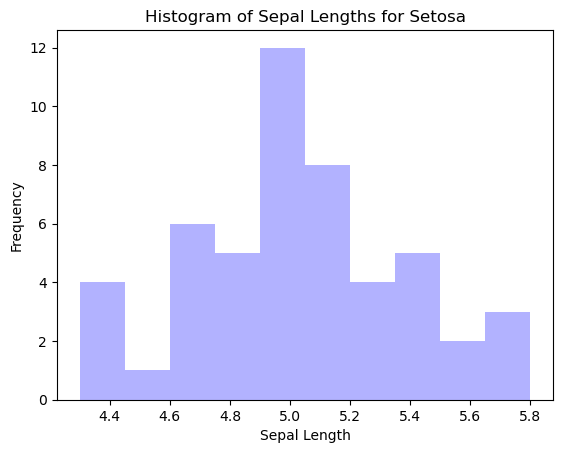

In [58]:
# Create histogram of sepal lengths for species: 'setosa'
setosa_data = df[df['species'] == 'setosa']['sepal_length']
plt.hist(setosa_data, bins=10, alpha=0.3, color='blue')
plt.title("Histogram of Sepal Lengths for Setosa")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()


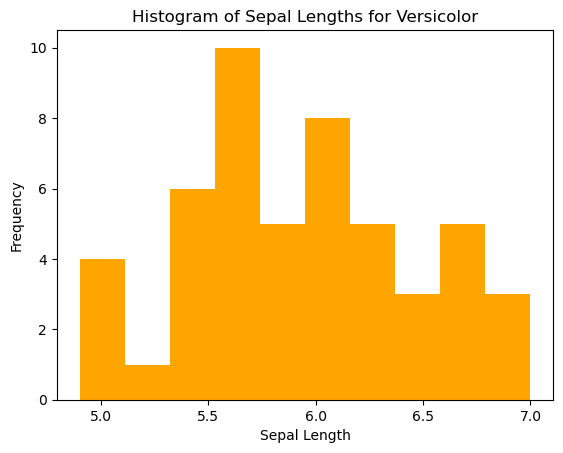

In [57]:
versicolor_data = df[df['species']=='versicolor']['sepal_length']
plt.hist(x=versicolor_data, color='orange')
plt.title("Histogram of Sepal Lengths for Versicolor")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()


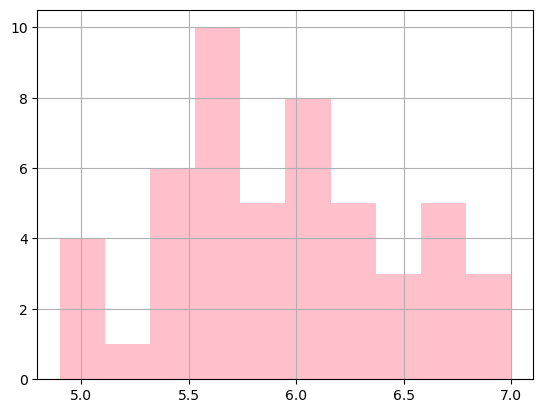

In [66]:
# histogram plot for sepal lengths for a given species, say 'versicolor'
versicolor_data = df[df['species']=='versicolor']['sepal_length'].hist(bins=10, color='pink')


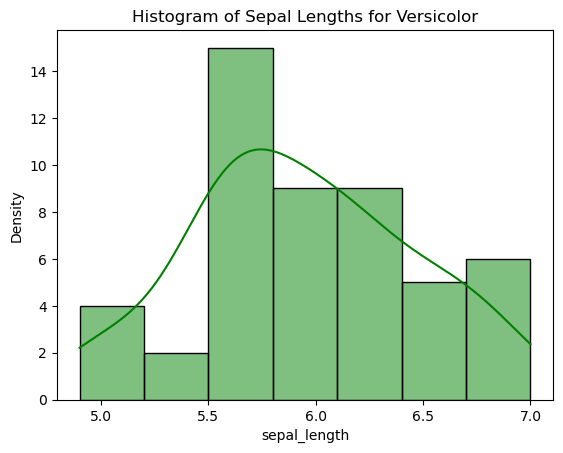

In [78]:
# histogram plot for sepal lengths for a given species, say 'versicolor'
versicolor_data = df[df['species']=='versicolor']['sepal_length']
sns.histplot(versicolor_data, kde=True, color='green')
plt.title("Histogram of Sepal Lengths for Versicolor")
# plt.xlabel("Sepal Length")
plt.ylabel("Count" if not kde else "Density")
plt.show()

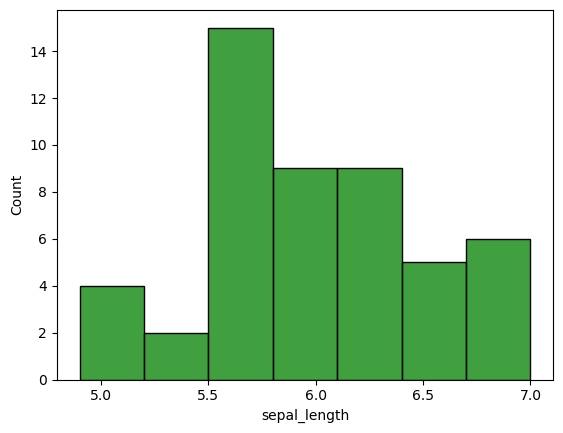

In [81]:
# histogram plot for sepal lengths for a given species, say 'versicolor'
versicolor_data = df[df['species']=='versicolor']['sepal_length']
sns.histplot(x=versicolor_data, color='green')
plt.show()


# Origin: Seaborn, built on top of Matplotlib.
# Behavior:
# Modern aesthetics (nicer defaults).
# Supports KDE curve with kde=True.
# Flexible stat parameter ('count', 'density', 'probability', 'percent').
# Supports hue for grouped histograms, multiple plots in one call.
# Return value: A Matplotlib Axes object (but styled via Seaborn’s theme).
# Style: Applies Seaborn theme automatically (unless overridden).


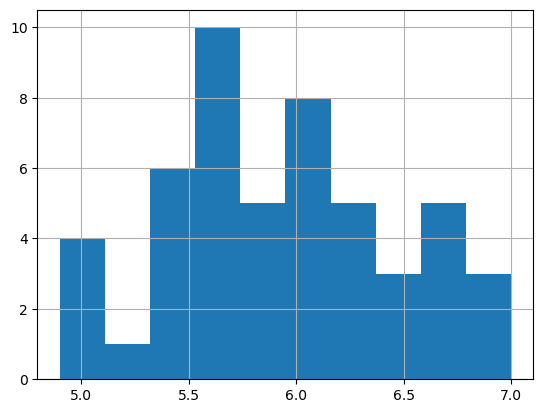

In [82]:
# histogram plot for sepal lengths for a given species, say 'versicolor'
versicolor_data = df[df['species']=='versicolor']['sepal_length'].hist()

# Origin: Pandas’ built-in wrapper around matplotlib.pyplot.hist.
# Behavior:
# Creates a basic Matplotlib histogram.
# Limited customization (bins, color, alpha, etc.).
# No KDE (kernel density curve) option.
# Return value: A Matplotlib AxesSubplot object.
# Style: Uses Matplotlib’s default style (unless you set a theme).

In [77]:
# Here’s the quick breakdown of how sns.histplot() treats x differently depending on whether it’s 
# a string or a Series/array:

# Case 1 : x is a string (column name)
# python
# Copy
# Edit
# sns.histplot(data=df, x='sepal_length', color='green')
# x = column name "sepal_length".

# Seaborn looks inside data=df for that column.

# You must pass data when x is a column name.

# Case 2 : x is a Pandas Series or NumPy array
# python
# Copy
# Edit
# versicolor_data = df[df['species'] == 'versicolor']['sepal_length']
# sns.histplot(x=versicolor_data, color='green')
# or even shorter:

# python
# Copy
# Edit
# sns.histplot(versicolor_data, color='green')
# x is already numeric data.

# Seaborn ignores data= (even if you pass it).

# No need for data= because you’re not referencing a column name.

# What about y?
# In histograms, y is not explicitly given — it’s computed internally as:

# Counts (stat='count') — default

# Density (stat='density' or when kde=True)

# Probability (stat='probability')

# Percent (stat='percent')

# So y is generated from x automatically.

# ✅ Key takeaway:

# String → column name, needs data=df.

# Series/array → raw values, no data= needed.

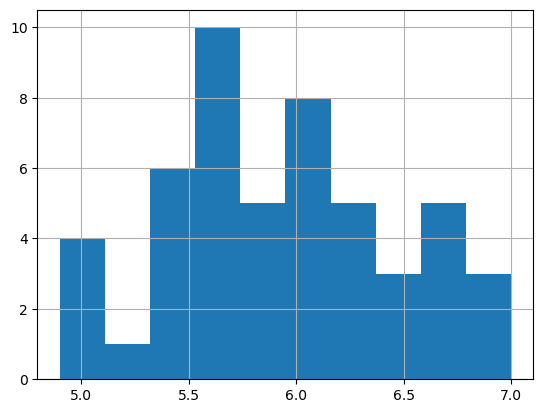

In [86]:
# Quantiles for sepal_length using pandas
quantiles = df['sepal_length'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)


0.00    4.3
0.25    5.1
0.50    5.8
0.75    6.4
1.00    7.9
Name: sepal_length, dtype: float64


In [87]:
# Quantiles for sepal_length using numpy
quantiles = np.quantile(df['sepal_length'], [0, 0.25, 0.5, 0.75, 1])
print(quantiles)


[4.3 5.1 5.8 6.4 7.9]


In [88]:
# Quintiles for sepal_length using pandas
quintiles = df['sepal_length'].quantile([0.2, 0.4, 0.6, 0.8])
print(quintiles)

# Quintiles for sepal_length using numpy
quintiles = np.quantile(df['sepal_length'], [0.2, 0.4, 0.6, 0.8])
print(quintiles)


0.2    5.00
0.4    5.60
0.6    6.10
0.8    6.52
Name: sepal_length, dtype: float64
[5.   5.6  6.1  6.52]


In [89]:
# Quartiles for sepal_length using pandas
quartiles = df['sepal_length'].quantile([0.25, 0.5, 0.75])
print(quartiles)

# Quartiles for sepal_length using numpy
quartiles = np.quantile(df['sepal_length'], [0.25, 0.5, 0.75])
print(quartiles)


0.25    5.1
0.50    5.8
0.75    6.4
Name: sepal_length, dtype: float64
[5.1 5.8 6.4]


In [97]:
# Example Series
s = df['sepal_length']

# Quantile (general form)
print(s.quantile(0.25))   # 1st quartile (Q1)
print(s.quantile(0.5))    # median (Q2)
print(s.quantile(0.75))   # 3rd quartile (Q3)

# Multiple quantiles at once
print(s.quantile([0.1, 0.2, 0.5, 0.9]))   # deciles/quintiles/etc.

5.1
5.8
6.4
0.1    4.8
0.2    5.0
0.5    5.8
0.9    6.9
Name: sepal_length, dtype: float64


In [98]:
np.percentile(s, [25, 50, 75])   # quartiles using numpy percentile

array([5.1, 5.8, 6.4])

In [99]:
# If you want the quantile cut points (boundaries between bins)
# Generate 12 equal quantile boundaries
quantile_edges = s.quantile(np.linspace(0, 1, 13))  # 13 points = 12 bins, np.linspace(0, 1, 13) → [0, 1/12, 2/12, …, 1]

print(quantile_edges)

0.000000    4.300000
0.083333    4.800000
0.166667    5.000000
0.250000    5.100000
0.333333    5.400000
0.416667    5.600000
0.500000    5.800000
0.583333    6.000000
0.666667    6.300000
0.750000    6.400000
0.833333    6.700000
0.916667    6.958333
1.000000    7.900000
Name: sepal_length, dtype: float64


In [111]:
# Difference from pd.cut():
# pd.cut() → splits into equal-width bins (based on range).
# pd.qcut() → splits into equal-frequency bins (based on quantiles).


# Assign bins 1 through 4
s_bins = pd.qcut(s, q=4, labels=False) + 1  
# s_bins is a pandas Series that contains, for each row in the original data, the quantile bin label assigned based on the value of s
# labels=False means the output will be bin numbers starting from 0 to 3.
# Adding +1 shifts the bin numbers to 1 to 4.
# So each sepal_length value in s will be labeled 1, 2, 3, or 4 based on which quartile it falls into
print(s_bins.head(20))

0     1
1     1
2     1
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    2
11    1
12    1
13    1
14    2
15    2
16    2
17    1
18    2
19    1
Name: sepal_length, dtype: int64


In [119]:
s_bins[18] # it means the 19th row’s sepal_length lies in the second quantile (the 25%-50% range) of the entire sepal_length distribution

2

In [120]:
s_bins[140] #  it means the 141st row’s sepal_length lies in the fourth quantile (the 75%-100% range) of the entire sepal_length distribution

4

In [121]:
bin_counts = s_bins.value_counts().sort_index()
print(bin_counts)

sepal_length
1    41
2    39
3    35
4    35
Name: count, dtype: int64


In [104]:
type(s_bins)

pandas.core.series.Series

In [105]:
type(bin_counts)

pandas.core.series.Series

In [123]:
first_quartile_data = s[s_bins == 1]
print(first_quartile_data)
print(f"First quartile data count: {len(first_quartile_data)}")

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
6      4.6
7      5.0
8      4.4
9      4.9
11     4.8
12     4.8
13     4.3
17     5.1
19     5.1
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
29     4.7
30     4.8
34     4.9
35     5.0
37     4.9
38     4.4
39     5.1
40     5.0
41     4.5
42     4.4
43     5.0
44     5.1
45     4.8
46     5.1
47     4.6
49     5.0
57     4.9
60     5.0
93     5.0
98     5.1
106    4.9
Name: sepal_length, dtype: float64
First quartile data count: 41


In [124]:
last_quartile_data = s[s_bins == 4]
print(last_quartile_data)
print(f"Last quartile data count: {len(last_quartile_data)}")

50     7.0
52     6.9
54     6.5
58     6.6
65     6.7
75     6.6
76     6.8
77     6.7
86     6.7
102    7.1
104    6.5
105    7.6
107    7.3
108    6.7
109    7.2
110    6.5
112    6.8
116    6.5
117    7.7
118    7.7
120    6.9
122    7.7
124    6.7
125    7.2
129    7.2
130    7.4
131    7.9
135    7.7
139    6.9
140    6.7
141    6.9
143    6.8
144    6.7
145    6.7
147    6.5
Name: sepal_length, dtype: float64
Last quartile data count: 35


In [126]:
# Outliers

# Select sepal_length series
s = df['sepal_length']

# Compute 1st quartile (Q1), 3rd quartile (Q3), and IQR
q1 = np.quantile(s, 0.25)
q3 = np.quantile(s, 0.75)
iqr = q3 - q1

# Define outlier cutoffs
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f"Lower cutoff: {lower}")
print(f"Upper cutoff: {upper}")

# Subset sepal_length to find outliers
outliers = s[(s < lower) | (s > upper)]

print("\nOutliers detected in sepal_length:")
print(outliers)

Lower cutoff: 3.1499999999999986
Upper cutoff: 8.350000000000001

Outliers detected in sepal_length:
Series([], Name: sepal_length, dtype: float64)
